In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [53]:
df = pd.read_csv(r"C:\Users\Javed\Downloads\hyundi.csv")
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


# Check dataset size

In [54]:
df.shape

(4860, 9)

# Find and treat missing values (If any)

In [55]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

# Check column types and describe which columns are numerical or categorical

In [56]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [57]:
df[['year','price']].agg(['sum','min'])

,year,price
sum,9803143,61965637
min,2000,1200


# Perform Univariate analysis
Calculate mean, median, std dev, and quartiles of numerical data


In [58]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


# Plot histogram for a few categorical variables

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

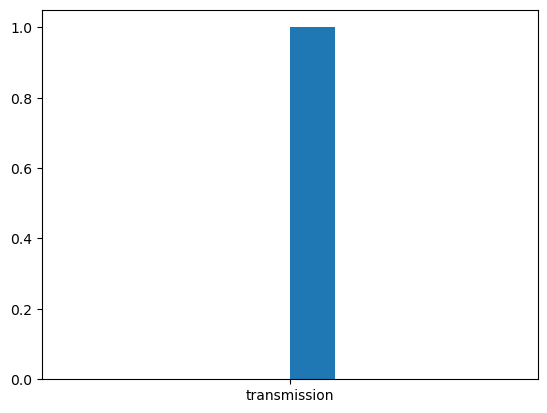

In [59]:
plt.hist('transmission')

# Check the distribution of numerical variables and comment on it

# Perform Bivariate analysis
Plot pair plots

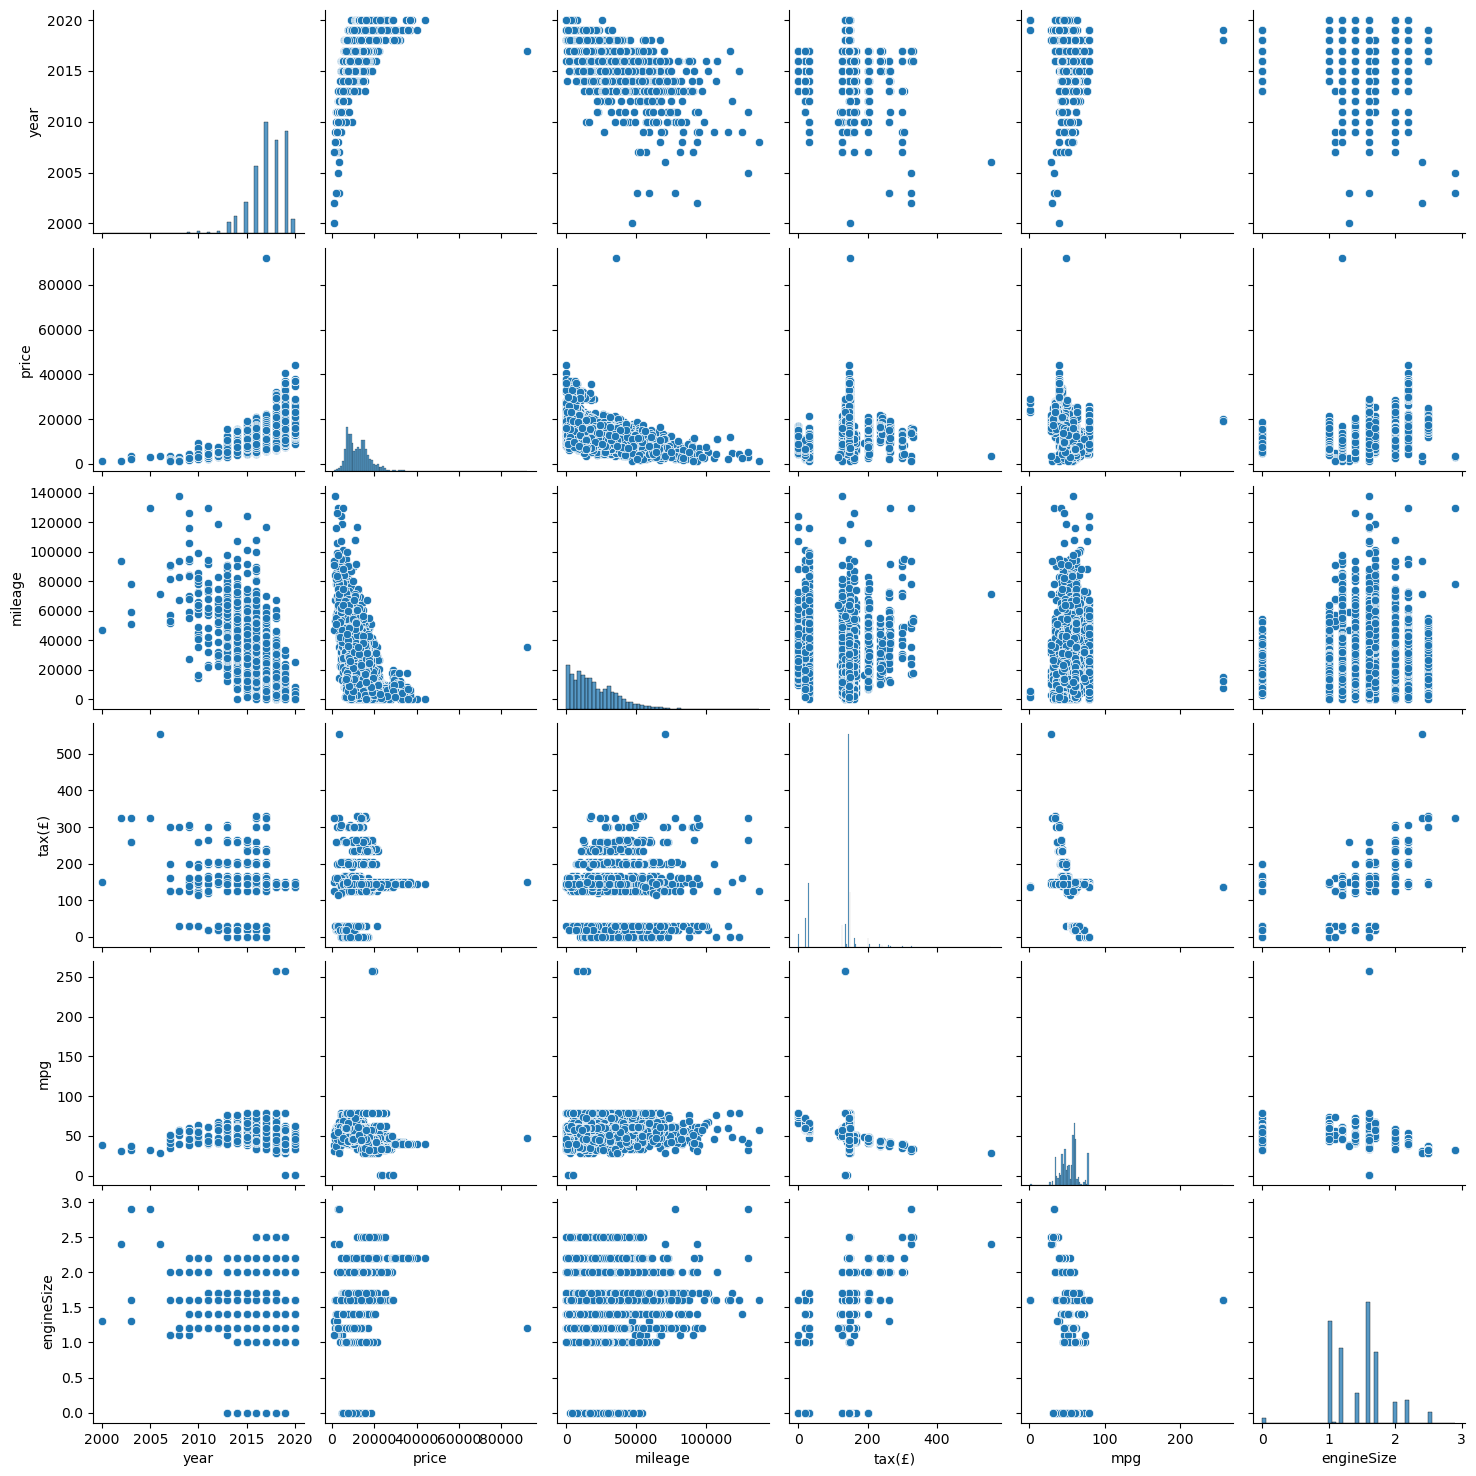

In [60]:
sns.pairplot(df)

# Outlier removing

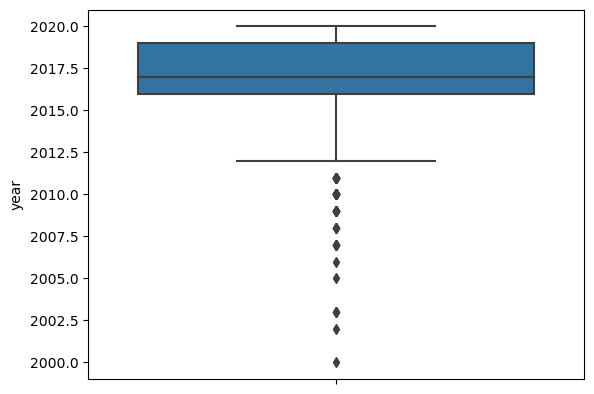

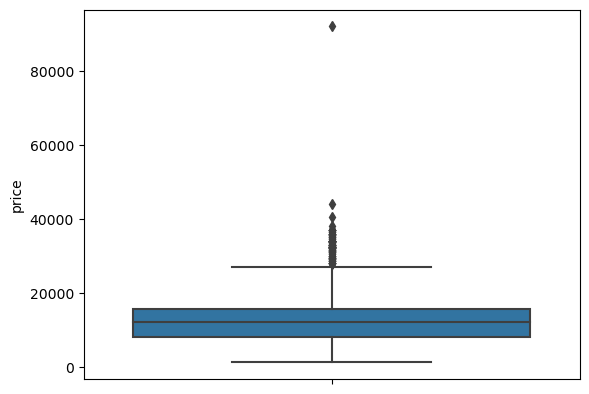

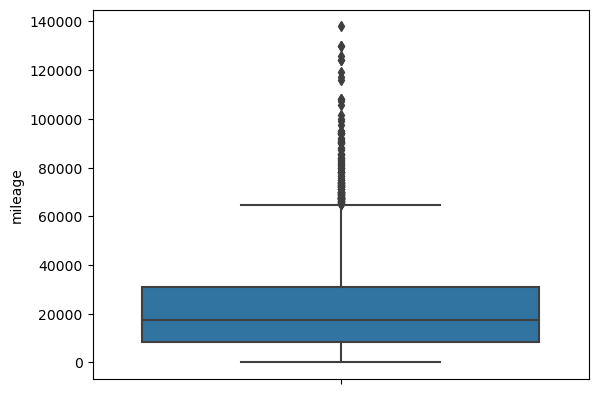

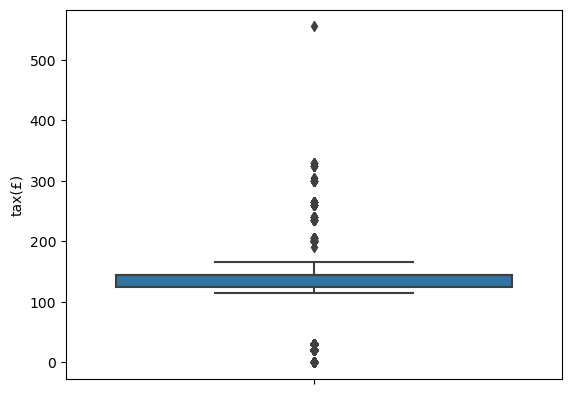

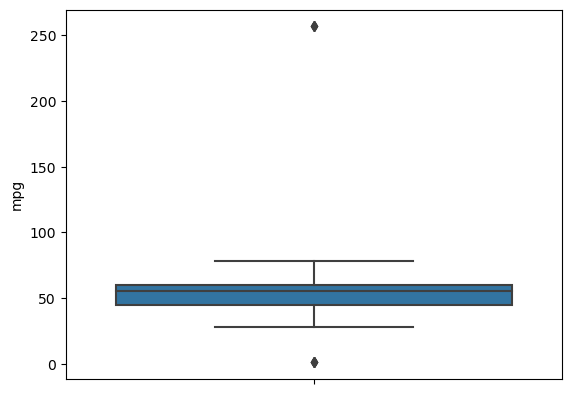

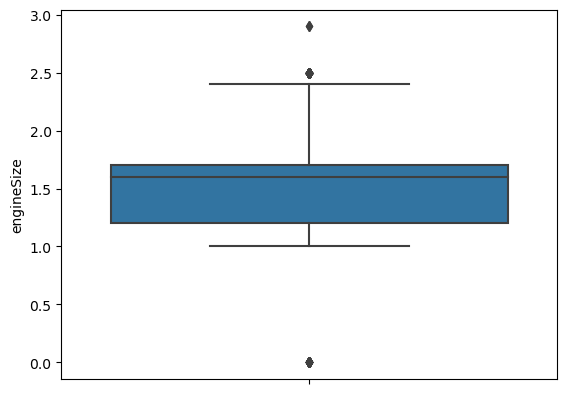

In [61]:
for i in df.columns:
    if df[i].dtypes == object:
        continue
    plt.figure()
    sns.boxplot(y = df[i])

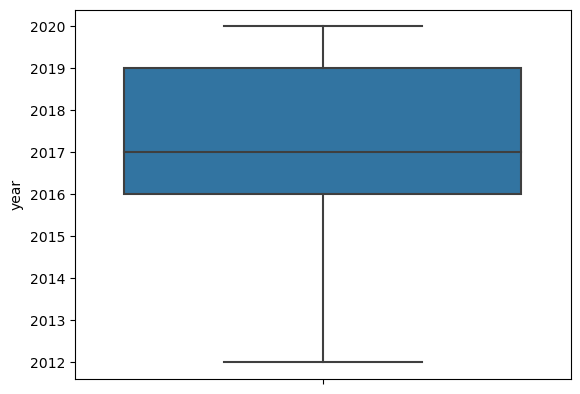

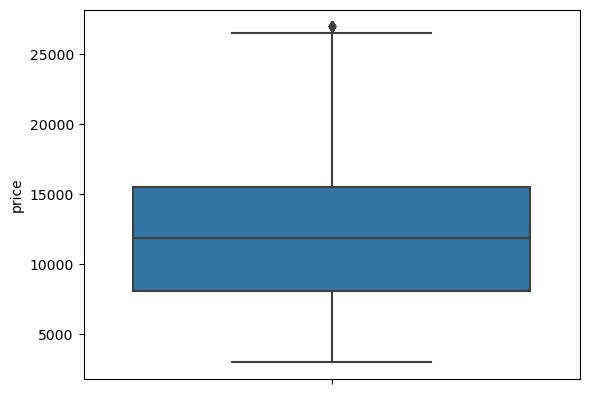

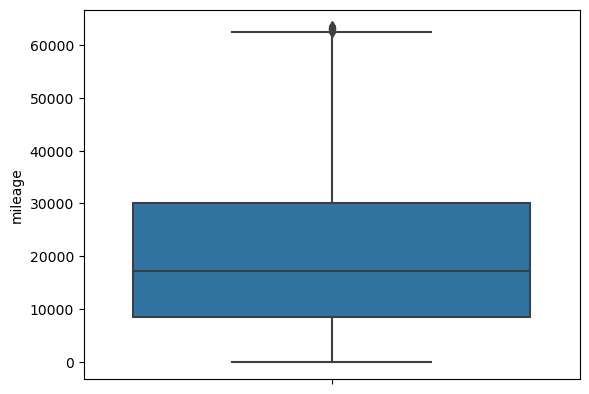

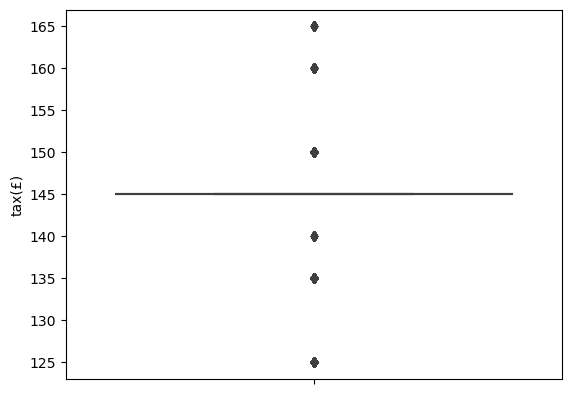

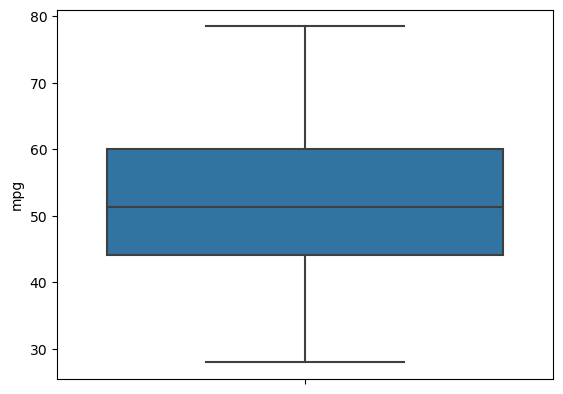

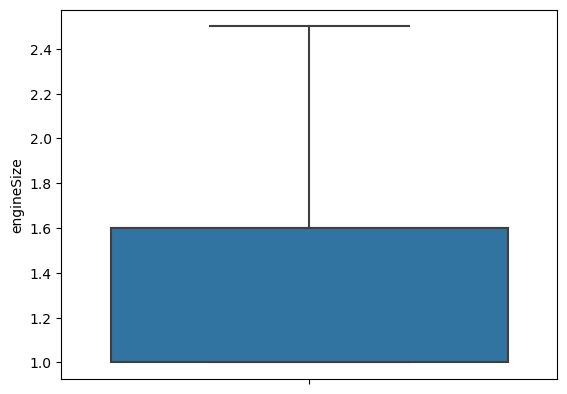

In [62]:
for i in df.columns:
    if df[i].dtypes == object:
        continue
    
    p25=df[i].quantile(0.25)
    p75=df[i].quantile(0.75)
    iqr=p75-p25
    low=p25-(1.5*iqr)
    up=p75+(1.5*iqr)
    df=df[(df[i]>=low) & (df[i]<=up)]
    plt.figure()
    sns.boxplot(y = df[i])

In [63]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
7,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7
8,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4
10,Tucson,2017,13200,Manual,22888,Diesel,150,61.7,1.7
...,...,...,...,...,...,...,...,...,...
4850,I10,2018,7200,Manual,17879,Petrol,145,60.1,1.0
4851,I10,2018,7995,Manual,8851,Petrol,145,60.1,1.0
4852,I10,2018,7200,Manual,14788,Petrol,150,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


# Perform a Chi-square analysis to check whether there is a relationship between
### transmission and fuelType
### fuelType and model


In [64]:
df[['transmission','fuelType']].corr()

""


In [65]:
df[['model','fuelType']].corr()

""


# Calculate Pearson correlation, and plot their heatmap

In [66]:
y = df.corr()
y

,year,price,mileage,tax(£),mpg,engineSize
year,1.000000,0.517359,-0.663582,0.040070,-0.166811,-0.110398
price,0.517359,1.000000,-0.384605,-0.136201,-0.257696,0.534298
mileage,-0.663582,-0.384605,1.000000,-0.041722,0.152616,0.248003
tax(£),0.040070,-0.136201,-0.041722,1.000000,-0.335550,-0.122999
mpg,-0.166811,-0.257696,0.152616,-0.335550,1.000000,-0.214089
engineSize,-0.110398,0.534298,0.248003,-0.122999,-0.214089,1.000000


<AxesSubplot:>

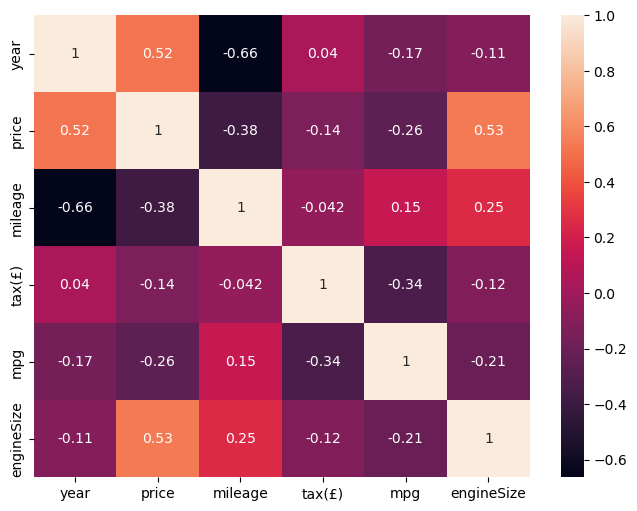

In [67]:
plt.figure(figsize = (8,6))
sns.heatmap(y, annot = True)

In [68]:
df.head(4)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
7,Tucson,2016,14199,Automatic,30300,Diesel,125,57.6,1.7
8,I30,2018,10399,Automatic,38082,Petrol,145,51.4,1.4


# Drop any unnecessary columns

In [69]:
df.drop('model',axis = 1,inplace = True)

In [70]:
df

,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,2017,7999,Manual,17307,Petrol,145,58.9,1.2
4,2015,10199,Manual,33177,Diesel,160,51.4,2.0
7,2016,14199,Automatic,30300,Diesel,125,57.6,1.7
8,2018,10399,Automatic,38082,Petrol,145,51.4,1.4
10,2017,13200,Manual,22888,Diesel,150,61.7,1.7
...,...,...,...,...,...,...,...,...
4850,2018,7200,Manual,17879,Petrol,145,60.1,1.0
4851,2018,7995,Manual,8851,Petrol,145,60.1,1.0
4852,2018,7200,Manual,14788,Petrol,150,60.1,1.0
4858,2018,13994,Manual,23313,Petrol,145,44.8,1.6


In [71]:
for i in df.columns:
    if df[i].dtypes == object:
        print(df[i].unique() ,'\n\n')

['Manual' 'Automatic' 'Semi-Auto' 'Other'] 


['Petrol' 'Diesel' 'Hybrid' 'Other'] 




# Split into train and test set

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()

In [74]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = le.fit_transform(df[i])

In [75]:
df

,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,2017,7999,1,17307,3,145,58.9,1.2
4,2015,10199,1,33177,0,160,51.4,2.0
7,2016,14199,0,30300,0,125,57.6,1.7
8,2018,10399,0,38082,3,145,51.4,1.4
10,2017,13200,1,22888,0,150,61.7,1.7
...,...,...,...,...,...,...,...,...
4850,2018,7200,1,17879,3,145,60.1,1.0
4851,2018,7995,1,8851,3,145,60.1,1.0
4852,2018,7200,1,14788,3,150,60.1,1.0
4858,2018,13994,1,23313,3,145,44.8,1.6


In [76]:
x = df.iloc[:,:-1].values

In [77]:
y = df.iloc[:,-1].values

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2)

In [80]:
# from sklearn.preprocessing import StandardScaler

In [81]:
# sc = StandardScaler()

In [82]:
# x_train = sc.fit_transform(x_train)

In [83]:
# x_test = sc.fit_transform(x_test)

In [84]:
# from sklearn.linear_model import LinearRegression

In [85]:
# reg = LinearRegression()

In [86]:
# reg.fit(x_train,y_train)

In [87]:
# reg.intercept_

In [88]:
# reg.coef_

In [89]:
# y_pred = reg.predict(x_test)

In [90]:
# from sklearn.metrics import mean_squared_error

In [91]:
# mean_squared_error(y_test,y_pred)

In [92]:
# from sklearn.metrics import r2_score

In [93]:
# LRM = r2_score(y_test,y_pred)
LRM

NameError: name 'LRM' is not defined

# Making another model using Logistic Regression 
### ( LR is basically used to predict categorical variable )

In [ ]:
x = df.drop('price',axis = 1).values
x

In [ ]:
y = df['price'].values
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# sc = StandardScaler()

In [ ]:
# x_train = sc.fit_transform(x_train)
# x_train

In [ ]:
# x_test = sc.fit_transform(x_test)
# x_test

In [ ]:
# from sklearn.linear_model import LogisticRegression

In [ ]:
# classifier = LogisticRegression()

In [ ]:
# classifier.fit(x_train,y_train)

In [ ]:
# y_pred = classifier.predict(x_test)

Evaluation Matrics

In [ ]:
# from sklearn.metrics import confusion_matrix

In [ ]:
# confusion_matrix(y_test , y_pred)

In [ ]:
# from sklearn.metrics import accuracy_score

In [ ]:
# LoGR = accuracy_score(y_test,y_pred)
LoGR

# Decision Tree 

In [ ]:
x = df.drop('price',axis = 1).values
x

In [ ]:
y = df['price'].values
y

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dc = DecisionTreeClassifier()

In [ ]:
dc.fit(x_train , y_train)

In [ ]:
y_pred = dc.predict(x_test)

In [ ]:
df.head(2)

In [94]:
confusion_matrix(y_test,y_pred)

NameError: name 'confusion_matrix' is not defined

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

# Random Forest

In [97]:
x = df.drop('price',axis = 1).values
x

array([[2.0170e+03, 1.0000e+00, 1.7307e+04, ..., 1.4500e+02, 5.8900e+01,
        1.2000e+00],
       [2.0150e+03, 1.0000e+00, 3.3177e+04, ..., 1.6000e+02, 5.1400e+01,
        2.0000e+00],
       [2.0160e+03, 0.0000e+00, 3.0300e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00],
       ...,
       [2.0180e+03, 1.0000e+00, 1.4788e+04, ..., 1.5000e+02, 6.0100e+01,
        1.0000e+00],
       [2.0180e+03, 1.0000e+00, 2.3313e+04, ..., 1.4500e+02, 4.4800e+01,
        1.6000e+00],
       [2.0160e+03, 0.0000e+00, 1.1472e+04, ..., 1.2500e+02, 5.7600e+01,
        1.7000e+00]])

In [98]:
y = df['price'].values
y

array([ 7999, 10199, 14199, ...,  7200, 13994, 15999], dtype=int64)

In [99]:
x_train

array([[2.0190e+03, 1.0500e+04, 1.0000e+00, ..., 3.0000e+00, 1.4500e+02,
        4.6300e+01],
       [2.0170e+03, 8.9950e+03, 1.0000e+00, ..., 3.0000e+00, 1.4500e+02,
        5.8900e+01],
       [2.0170e+03, 1.4550e+04, 3.0000e+00, ..., 0.0000e+00, 1.2500e+02,
        5.7600e+01],
       ...,
       [2.0190e+03, 2.3991e+04, 0.0000e+00, ..., 1.0000e+00, 1.3500e+02,
        7.8500e+01],
       [2.0190e+03, 2.2020e+04, 3.0000e+00, ..., 3.0000e+00, 1.5000e+02,
        3.4000e+01],
       [2.0190e+03, 8.9950e+03, 1.0000e+00, ..., 3.0000e+00, 1.4500e+02,
        6.0100e+01]])

In [100]:
y_train 

array([1.2, 1.2, 1.7, ..., 1.6, 1.6, 1. ])

In [101]:
y_train

array([1.2, 1.2, 1.7, ..., 1.6, 1.6, 1. ])

In [102]:
y_test

array([1.6, 1. , 1.6, 1. , 1.2, 1. , 1.6, 1.4, 1.4, 1.2, 1.6, 1.6, 1.6,
       1. , 1.6, 1.2, 1.6, 1.6, 1. , 1.6, 1. , 1.6, 1.7, 1.7, 1. , 1.6,
       1.6, 1. , 1.6, 1. , 1. , 1.4, 1.6, 1.2, 1. , 1.2, 1. , 1.7, 1.6,
       1.6, 1. , 1.6, 1.4, 1.2, 1.6, 1.6, 1.7, 1.6, 1.6, 1.6, 1.7, 2.2,
       1. , 1. , 1. , 1.2, 1.6, 1. , 1. , 2.5, 1. , 1.6, 1.6, 1. , 1. ,
       1.2, 1. , 1. , 1.4, 2. , 2.2, 1.6, 1.6, 1.6, 1. , 1.6, 2.5, 1.4,
       1. , 1.4, 1.2, 1.6, 1. , 1.6, 2.2, 1. , 1.6, 1.2, 1.6, 1.6, 1. ,
       1.6, 1.6, 1.6, 1.4, 1.6, 1.2, 1.2, 1.6, 1.6, 2. , 2. , 1.2, 1. ,
       1. , 1.7, 1.2, 1.7, 1. , 1.6, 1. , 1.6, 1. , 1. , 1.6, 1.6, 2.5,
       1. , 1.7, 1.2, 1.6, 1.6, 1.6, 1.7, 1. , 1.4, 1.2, 1.2, 1. , 1. ,
       1. , 1. , 2.5, 1.6, 1.7, 1. , 1.6, 1.6, 1.6, 1. , 1. , 1. , 1.6,
       1.4, 1.6, 1.4, 1.2, 1.2, 1.2, 1.6, 1.6, 1.6, 1.4, 1.6, 1.6, 1.2,
       2.5, 1. , 1.6, 1.6, 1.6, 1. , 1.6, 1.7, 1. , 1. , 2.5, 1. , 1.4,
       1.4, 1.6, 1.6, 2.5, 1.2, 1. , 1.2, 1.6, 1. , 1.2, 1. , 1.

Hyperparameter training

In [103]:
no_of_decision_trees = [10,20,30,40,50,60,70,80]
max_no_of_features = ['sqrt','log2',90,100]
max_depth_of_decision_tree = [6,7,8,9,10,11,12,13,14,15]
criterion_for_decision_trees = ['gini','empathy']
min_sample_split = [1,2,3,4,5]

In [104]:
random_grid={
    'n_estimators': no_of_decision_trees,
    'max_features': max_no_of_features,
    'max_depth': max_depth_of_decision_tree,
    'criterion': criterion_for_decision_trees,
    'min_samples_split': min_sample_split
}

In [105]:
type(random_grid)

dict

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [107]:
from sklearn.model_selection import RandomizedSearchCV
rscv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=25, cv=5, n_jobs=-1)

In [109]:
rscv.fit(x_train,y_train)

C:\Users\Javed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Javed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Javed\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\Javed\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 734, in _validate_y_class_weight
    check_classification_t

ValueError: Unknown label type: 'continuous'

In [ ]:
rscv.best_params_

In [ ]:
rf_final=RandomForestClassifier(n_estimators=100,min_samples_split=5,max_features="sqrt", max_depth=7,criterion="entropy")

In [ ]:
rf_final.fit(x_train,y_train)

In [ ]:
Y_pred=rf_final.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Use grid search CV to tune the hyperparameter of the best model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [ ]:

# create some data
X, y = make_classification(n_samples=1000)

In [ ]:
# define the model to optimize
model = DecisionTreeClassifier()

In [ ]:
# define the hyperparameter space to search over
param_grid = {'max_depth': range(1, 11)}

In [ ]:
# define the grid search object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

In [ ]:
# fit the grid search object
grid_search.fit(X, y)

In [ ]:
# extract the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# refit the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model

# Train a polynomial regression model with degrees 2, and 3 and compare its performance with other models 

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = x**2 - 5*x + 6 + np.random.randn(100)*5

# Split the data into training and testing sets
split = int(0.7*len(x))
x_train, y_train = x[:split], y[:split]
x_test, y_test = x[split:], y[split:]

# Create polynomial features with degree 2 and 3
poly2 = PolynomialFeatures(degree=2)
poly3 = PolynomialFeatures(degree=3)

x_train_poly2 = poly2.fit_transform(x_train.reshape(-1, 1))
x_train_poly3 = poly3.fit_transform(x_train.reshape(-1, 1))

# Train the polynomial regression models
poly_reg2 = LinearRegression()
poly_reg3 = LinearRegression()

poly_reg2.fit(x_train_poly2, y_train)
poly_reg3.fit(x_train_poly3, y_train)

# Plot the results
plt.scatter(x_train, y_train, color='blue')
plt.plot(x, poly_reg2.predict(poly2.transform(x.reshape(-1, 1))), label='Degree 2')
plt.plot(x, poly_reg3.predict(poly3.transform(x.reshape(-1, 1))), label='Degree 3')
plt.legend()
plt.show()